<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Checking versions of g++ and make
system("g++ --version", intern = TRUE)
system("make --version", intern = TRUE)

# Install g++ and make if needed
system("sudo apt install g++", intern = TRUE)
system("sudo apt install make", intern = TRUE)


[1] "g++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0"                                  
[2] "Copyright (C) 2021 Free Software Foundation, Inc."                          
[3] "This is free software; see the source for copying conditions.  There is NO" 
[4] "warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE."
[5] ""

[1] "GNU Make 4.3"                                                                 
[2] "Built for x86_64-pc-linux-gnu"                                                
[3] "Copyright (C) 1988-2020 Free Software Foundation, Inc."                       
[4] "License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>"
[5] "This is free software: you are free to change and redistribute it."           
[6] "There is NO WARRANTY, to the extent permitted by law."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "g++ is already the newest version (4:11.2.0-1ubuntu1)."         
[5] "0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "make is already the newest version (4.3-4.1build1)."            
[5] "0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded."

In [8]:
# Install cmdstanr from GitHub
if (!require(cmdstanr)) {
  devtools::install_github("stan-dev/cmdstanr")
}

# Set up CmdStan if it's not already set up
library(cmdstanr)
if (!cmdstanr::cmdstan_version()) {
  cmdstanr::install_cmdstan()
}

# Verify installation
cmdstanr::check_cmdstan_toolchain()


ERROR: Error in !cmdstanr::cmdstan_version(): invalid argument type


IF YOU ENCOUNTER AN ERROR, JUST KEEP RUNNING CODE BELOW.

In [9]:
# Install CmdStan using cmdstanr
library(cmdstanr)
cmdstanr::install_cmdstan()

# After installation, set the CmdStan path
cmdstan_path <- cmdstanr::cmdstan_path()
cmdstanr::set_cmdstan_path(cmdstan_path)

# Verify the installation
cmdstanr::cmdstan_version()


The C++ toolchain required for CmdStan is setup properly!

* Latest CmdStan release is v2.35.0

* Installing CmdStan v2.35.0 in /root/.cmdstan/cmdstan-2.35.0

* Downloading cmdstan-2.35.0.tar.gz from GitHub...

Warning message:
“An installation already exists at /root/.cmdstan/cmdstan-2.35.0. Please remove or rename the installation folder or set overwrite=TRUE.”
CmdStan path set to: /root/.cmdstan/cmdstan-2.35.0



[1] "2.35.0"

In [10]:
# Install necessary packages
install.packages(c("coda", "mvtnorm", "devtools", "loo", "dagitty", "shape"))

# Load devtools for GitHub installation
library(devtools)

# Install rethinking from GitHub
devtools::install_github("rmcelreath/rethinking")


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'rethinking' from a github remote, the SHA1 (ac1b3b2c) has not changed since last install.
  Use `force = TRUE` to force installation



In [11]:
library(rethinking)

In [12]:
# Test Installation

## Simulate some data for a binary outcome based on a single predictor
n <- 100
x <- rnorm(n)
prob <- 1 / (1 + exp(-x))
y <- rbinom(n, 1, prob)

## Fit a logistic regression using ulam
fit <- ulam(
  alist(
    y ~ bernoulli( p ),
    logit(p) <- a + b*x,
    a ~ normal(0, 1),
    b ~ normal(0, 1)
  ), data = list(x = x, y = y)
)

precis(fit)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.0 seconds.


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0.08172736,0.2236268,-0.2545433,0.435779,1.0057929,383.9144
b,1.08440570,0.2613965,0.6775849,1.486225,0.9992873,382.0373


# Chapter 13

## Easy

### 13E1
Which of the following priors will produce more *shrinkage* in the estimates?

> (a) $\alpha_{\text{TANK}} \sim \text{Normal}(0,1)$

> (b) $\alpha_{\text{TANK}} \sim \text{Normal}(0,2)$

#### Answer

"Shrinkage" describes the phenomenon wherein a (non-uniformly distributed) random effect *pulls* estimates closer together--towards the more probable values of the distribution for the random effects.

Intuitively, the more restrictive prior ((a) $\alpha_{\text{TANK}} \sim \text{Normal}(0,1)$) will cause more shrinkage.  Let's look at this by modifying model `m13.2`.

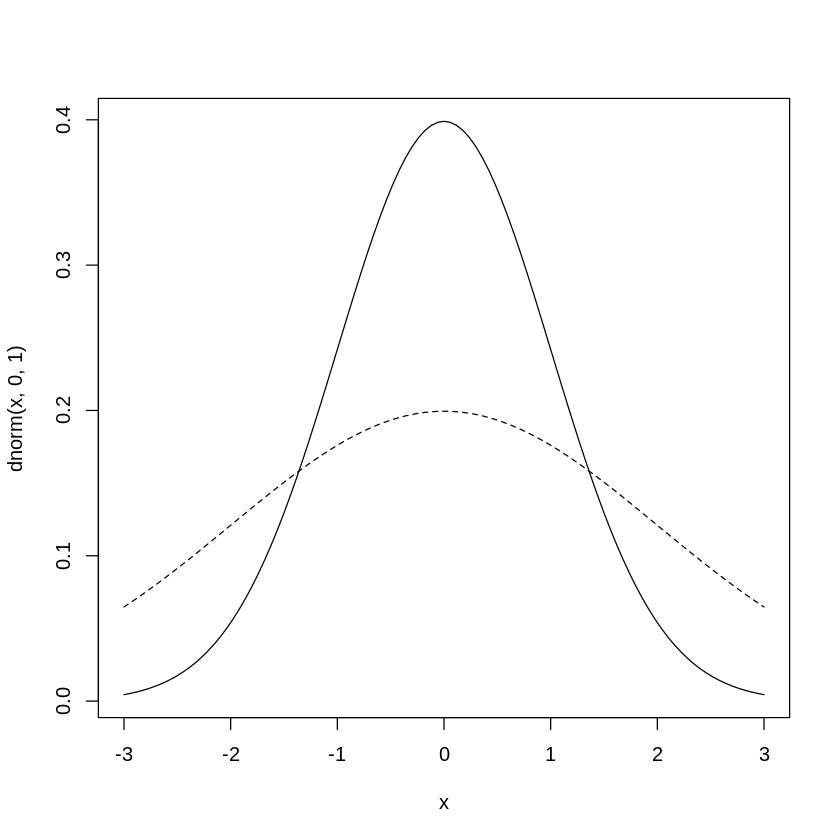

In [ ]:
curve(dnorm(x,0,1), from=-3,to=3)
curve(dnorm(x,0,2), from=-3,to=3, lty=2, add=TRUE)

In [ ]:
data(reedfrogs)
d <- reedfrogs

d$tank <- 1:nrow(d)
dat <- list(S = d$surv,
            N = d$density,
            tank = d$tank)

In [ ]:
m13.2_1 <- ulam(
  alist(
    S ~ dbinom(N, p),
      logit(p) <- a[tank],
        a[tank] ~ dnorm(0,1)
  ), data=dat,
     chains=4,
     log_lik=TRUE)

m13.2_2 <- ulam(
  alist(
    S ~ dbinom(N, p),
      logit(p) <- a[tank],
        a[tank] ~ dnorm(0,2)
  ), data=dat,
     chains=4,
     log_lik=TRUE)

Running MCMC with 4 sequential chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.2 seconds.
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 5

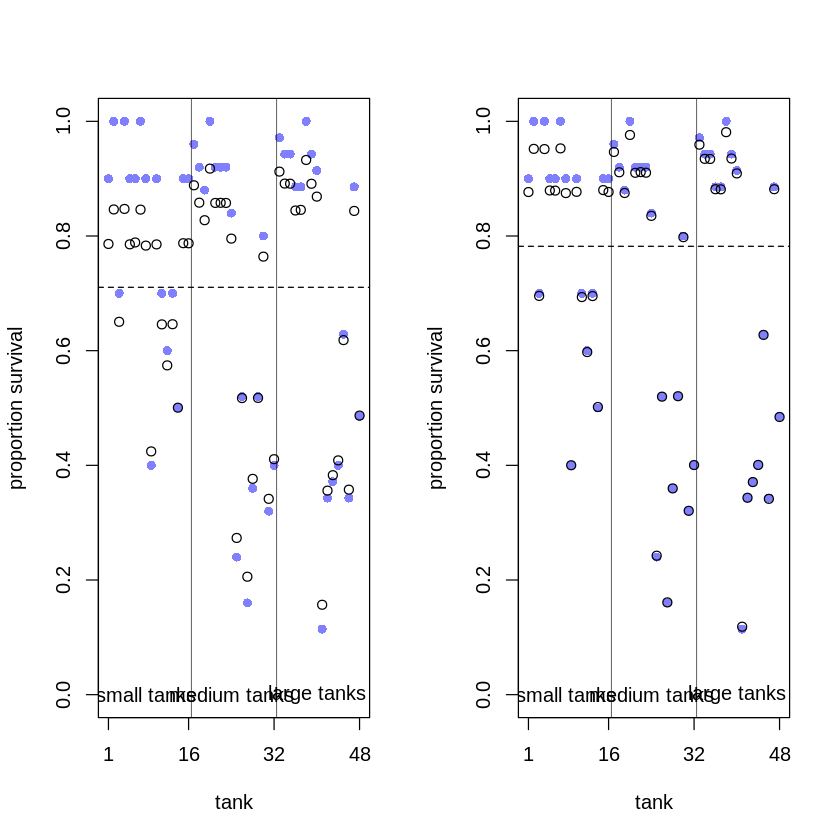

In [ ]:
post_1 <- extract.samples(m13.2_1)
post_2 <- extract.samples(m13.2_2)

par(mfrow=c(1,2))

d$propsurv.est_1 <- logistic(apply(post_1$a, 2, mean))
plot(d$propsurv, ylim=c(0,1), pch=16, xaxt="n",  xlab="tank", ylab="proportion survival", col=rangi2)
axis( 1, at=c(1,16,32,48), labels=c(1,16,32,48))
points( d$propsurv.est_1)
abline(h=inv_logit(mean(colMeans(post_1$a))), lty=2)
abline( v=16.5, lwd=0.5)
abline( v=32.5, lwd=0.5)
text( 8, 0, "small tanks")
text( 16+8, 0, "medium tanks")
text( 32+8, 0, "large tanks")

d$propsurv.est_2 <- logistic(apply(post_2$a, 2, mean))
plot(d$propsurv, ylim=c(0,1), pch=16, xaxt="n",  xlab="tank", ylab="proportion survival", col=rangi2)
axis( 1, at=c(1,16,32,48), labels=c(1,16,32,48))
points( d$propsurv.est_2)
abline(h=inv_logit(mean(colMeans(post_2$a))), lty=2)
abline( v=16.5, lwd=0.5)
abline( v=32.5, lwd=0.5)
text( 8, 0, "small tanks")
text( 16+8, 0, "medium tanks")
text( 32+8, 0, "large tanks")

Remember from the chapter that the blue dots are the actual data and the black circles are hte estimates of the *shrunken* model.  So the shrinkage can be seen by the distance between vertically corresponding blue dots and black circles.

We can also plot the accumulating difference between the empirical data and the shrunk estimates for the two priors, and take this sum.

[1] 2.68537

[1] 0.49449

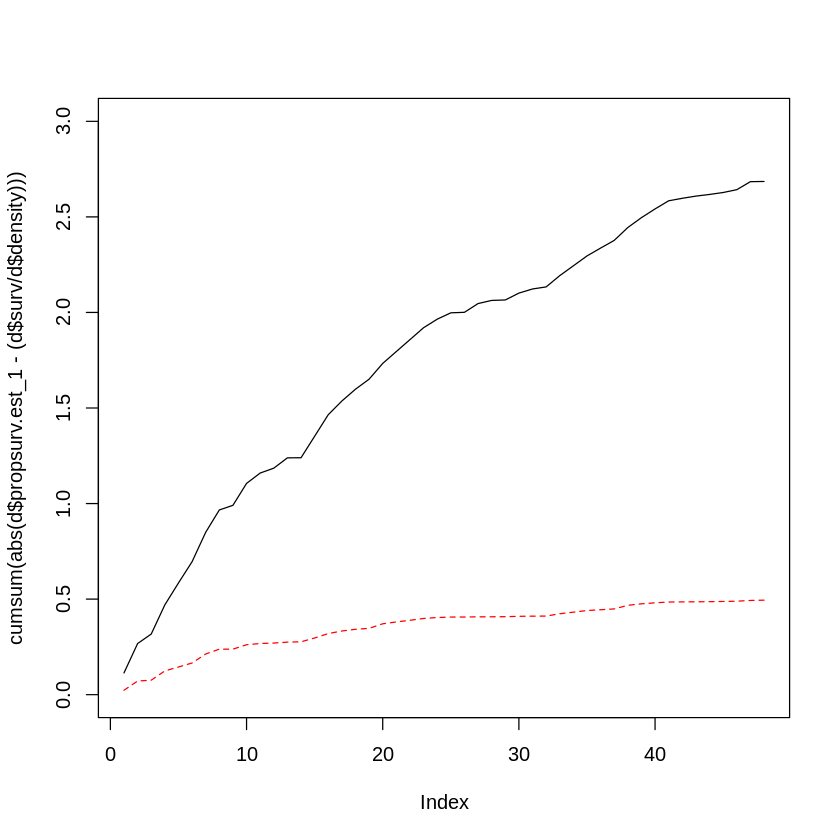

In [ ]:
plot(cumsum(abs(d$propsurv.est_1 - (d$surv/d$density))), type="l", ylim=c(0,3))
lines(cumsum(abs(d$propsurv.est_2 - (d$surv/d$density))), col="red", lty=2)

sum(abs(d$propsurv.est_1 - (d$surv/d$density)))
sum(abs(d$propsurv.est_2 - (d$surv/d$density)))

### 13E2

Rewrite the following model as a multilevel model.

$$y_i \sim \text{Binomial}(1, p_i)$$
$$\text{logit}(p_i) = \alpha_{\text{Group}_i} + \beta x_i$$
$$\alpha_{\text{Group}_i} \sim \text{Normal}(0, 1.5)$$
$$\beta \sim \text{Normal}(0, 0.5)$$

#### Answer
$$y_i \sim \text{Binomial}(1, p_i)$$
$$\text{logit}(p_i) = \alpha_{\text{Group}_i} + \beta x_i$$
$$\alpha_{\text{Group}_i} \sim \text{Normal}(\bar{\alpha}, \sigma_{\alpha})$$
$$\beta \sim \text{Normal}(0, 0.5)$$
$$\bar{\alpha} \sim \text{Normal}(0,1)$$
$$\sigma_{\alpha} \sim \text{Exponential}(0.66)$$

Just for kicks, let's look at the prior distribution of the mean for these models.

In [ ]:
dlist <- list("x" = rnorm(n=10, mean=0, sd=1),
              "y" = rbinom(n=10, size=1, prob=0.1 ),
              "group" = c(1,1,1,1,1,2,2,2,2,2))

In [ ]:
m <- ulam(
  alist(
    y ~ dbinom(1, p),
      logit(p) <- a[group] + b*x,
        a[group] ~ dnorm(0, 1.5),
        b ~ dnorm(0, 0.5)
  ), data=dlist, chains=4, cores=4, iter=1000
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

In [ ]:
mm <- ulam(
  alist(
    y ~ dbinom(1, p),
      logit(p) <- a[group] + b*x,
        a[group] ~ dnorm(abar, sigma_a),
          abar ~ dnorm(0,1),
          sigma_a ~ dexp(0.66),
        b ~ dnorm(0, 0.5)
  ), data=dlist, chains=4, cores=4, iter=1000
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 

See https://mc-stan.org/misc/warnings for details.




In [ ]:
m_prior <- extract.prior(m)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampli

In [ ]:
mm_prior <- extract.prior(mm)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampli

See https://mc-stan.org/misc/warnings for details.




In [ ]:
xseq <- seq(from=-3, to=3, length.out=100)

m_y1 <- matrix(data=NA, nrow=1000, ncol=length(xseq))
m_y2 <- matrix(data=NA, nrow=1000, ncol=length(xseq))
mm_y1 <- matrix(data=NA, nrow=1000, ncol=length(xseq))
mm_y2 <- matrix(data=NA, nrow=1000, ncol=length(xseq))
for(i in 1:length(xseq)){
  m_y1[,i] <- inv_logit(m_prior$a[,1] + m_prior$b*xseq[i])
  m_y2[,i] <- inv_logit(m_prior$a[,2] + m_prior$b*xseq[i])

  mm_y1[,i] <- inv_logit(mm_prior$a[,1] + mm_prior$b*xseq[i])
  mm_y2[,i] <- inv_logit(mm_prior$a[,2] + mm_prior$b*xseq[i])
}

m_y1_mean <- colMeans(m_y1)
m_y1_PI <- apply(m_y1, 2, PI)
m_y2_mean <- colMeans(m_y2)
m_y2_PI <- apply(m_y2, 2, PI)

mm_y1_mean <- colMeans(mm_y1)
mm_y1_PI <- apply(mm_y1, 2, PI)
mm_y2_mean <- colMeans(mm_y2)
mm_y2_PI <- apply(mm_y2, 2, PI)

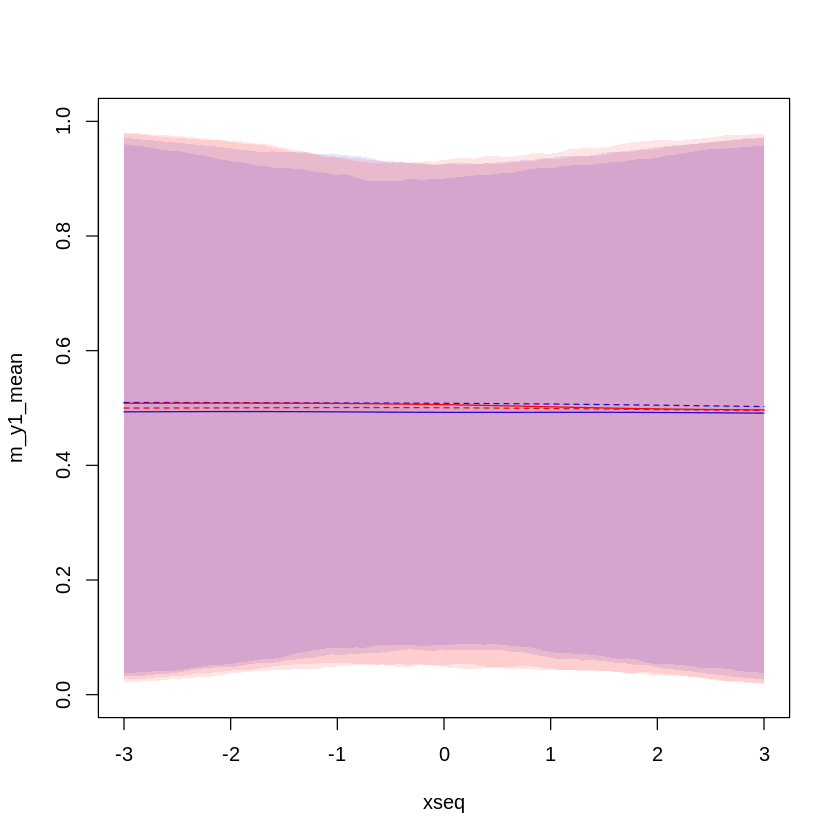

In [ ]:
plot(m_y1_mean ~ xseq, type="l", ylim=c(0, 1), col="blue")
lines(m_y2_mean ~ xseq, lty=2, col="blue")
shade(m_y1_PI, xseq, col=col.alpha("blue", 0.1))
shade(m_y2_PI, xseq, col=col.alpha("blue", 0.1))

lines(mm_y1_mean ~ xseq, col="red")
lines(mm_y2_mean ~ xseq, lty=2, col="red")
shade(mm_y1_PI, xseq, col=col.alpha("red", 0.1))
shade(mm_y2_PI, xseq, col=col.alpha("red", 0.1))

### 13E3

Rewrite the following model as a multilevel model.

$$y_i \sim \text{Normal}(\mu_i, \sigma)$$
$$\mu_i = \alpha_{\text{Group}_i} + \beta x_i$$
$$\alpha_{\text{Group}_i} \sim \text{Normal}(0, 5)$$
$$\beta \sim \text{Normal}(0, 1)$$
$$\sigma \sim \text{Exponential}(1)$$

#### Answer
$$y_i \sim \text{Normal}(\mu_i, \sigma)$$
$$\mu_i = \alpha_{\text{Group}_i} + \beta x_i$$
$$\alpha_{\text{Group}_i} \sim \text{Normal}(\bar{\alpha}, \sigma_{\alpha})$$
$$\beta \sim \text{Normal}(0, 1)$$
$$\bar{\alpha} \sim \text{Normal}(0,1)$$
$$\sigma_{\alpha} \sim \text{Exponential}(0.20)$$
$$\sigma \sim  \text{Exponential}(1)$$

Let's again look at the prior distribution of the mean.

In [ ]:
dlist <- list("x" = rnorm(n=10, mean=0, sd=1),
              "y" = rnorm(n=10, mean=1 + 2*x, sd=2),
              "group" = c(1,1,1,1,1,2,2,2,2,2))

In [ ]:
m <- ulam(
  alist(
    y ~ dnorm(mu, sigma),
      mu <- a[group] + b*x,
        a[group] ~ dnorm(0, 5),
        b ~ dnorm(0, 1),
      sigma ~ dexp(1)
  ), data=dlist, chains=4, cores=4, iter=1000
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

In [ ]:
mm <- ulam(
  alist(
    y ~ dnorm(mu, sigma),
      mu <- a[group] + b*x,
        a[group] ~ dnorm(abar, sigma_a),
          abar ~ dnorm(0,1),
          sigma_a ~ dexp(0.2),
        b ~ dnorm(0, 1),
          sigma_b ~ dexp(1),
      sigma ~ dexp(1)
  ), data=dlist, chains=4, cores=4, iter=1000
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 

See https://mc-stan.org/misc/warnings for details.




In [ ]:
m_prior <- extract.prior(m)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampli

In [ ]:
mm_prior <- extract.prior(mm)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampli

See https://mc-stan.org/misc/warnings for details.




In [ ]:
xseq <- seq(from=-3, to=3, length.out=100)

m_y1 <- matrix(data=NA, nrow=1000, ncol=length(xseq))
m_y2 <- matrix(data=NA, nrow=1000, ncol=length(xseq))
mm_y1 <- matrix(data=NA, nrow=1000, ncol=length(xseq))
mm_y2 <- matrix(data=NA, nrow=1000, ncol=length(xseq))
for(i in 1:length(xseq)){
  m_y1[,i] <- m_prior$a[,1] + m_prior$b*xseq[i]
  m_y2[,i] <- m_prior$a[,2] + m_prior$b*xseq[i]

  mm_y1[,i] <- mm_prior$a[,1] + mm_prior$b*xseq[i]
  mm_y2[,i] <- mm_prior$a[,2] + mm_prior$b*xseq[i]
}

m_y1_mean <- colMeans(m_y1)
m_y1_PI <- apply(m_y1, 2, PI)
m_y2_mean <- colMeans(m_y2)
m_y2_PI <- apply(m_y2, 2, PI)

mm_y1_mean <- colMeans(mm_y1)
mm_y1_PI <- apply(mm_y1, 2, PI)
mm_y2_mean <- colMeans(mm_y2)
mm_y2_PI <- apply(mm_y2, 2, PI)

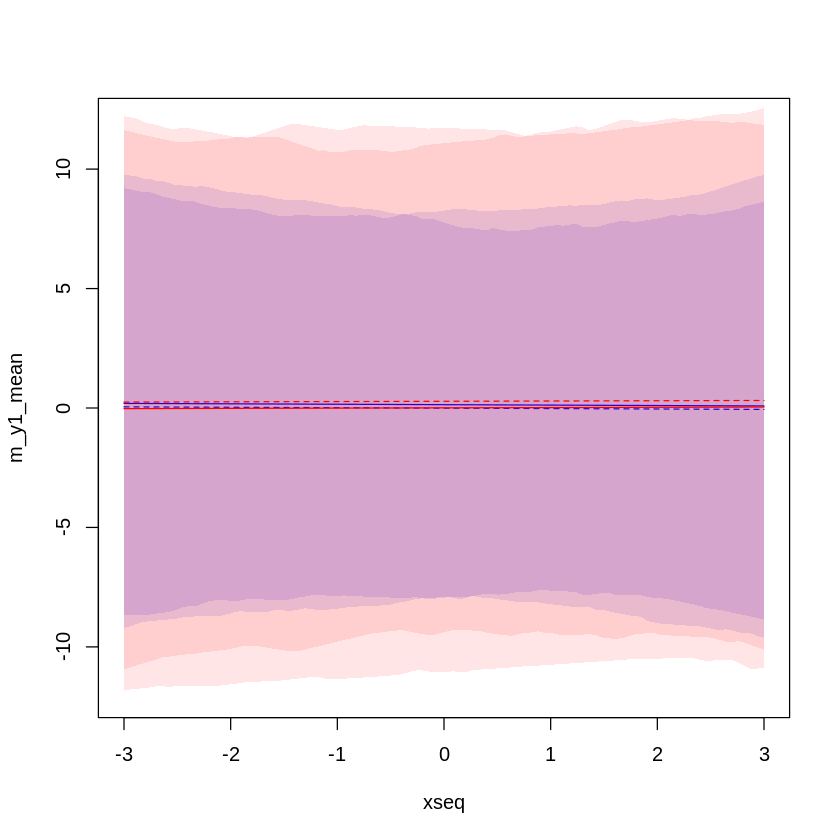

In [ ]:
plot(m_y1_mean ~ xseq, type="l", col="blue", ylim=c(-12,12))
lines(m_y2_mean ~ xseq, lty=2, col="blue")
shade(m_y1_PI, xseq, col=col.alpha("blue", 0.1))
shade(m_y2_PI, xseq, col=col.alpha("blue", 0.1))

lines(mm_y1_mean ~ xseq, col="red")
lines(mm_y2_mean ~ xseq, lty=2, col="red")
shade(mm_y1_PI, xseq, col=col.alpha("red", 0.1))
shade(mm_y2_PI, xseq, col=col.alpha("red", 0.1))

### 13E4

Write a mathematical model formula for Poisson regression with varying intercepts.

#### Answer

I'm just going to alter the model in the answer to 13E2

$$y_i \sim \text{Poisson}(\lambda)$$
$$\log(\lambda) = \alpha_{\text{Group}_i} + \beta x_i$$
$$\alpha_{\text{Group}_i} \sim \text{Normal}(\bar{\alpha}, \sigma_{\alpha})$$
$$\beta \sim \text{Normal}(0, 0.5)$$
$$\bar{\alpha} \sim \text{Normal}(0,1)$$
$$\sigma_{\alpha} \sim \text{Exponential}(0.66)$$

### 13E5

Write a mathematical model for a Poisson regression with two different kinds of varying intercepts, a cross-classified model.

#### Answer

Recall from the **Rethinking** box at the beginning of section 13.3, that *cross-classified* models are like hierarchcal models, except the study subjects (e.g., each individual chimp in the `chimpanzees` dataset) are not exclusively nested within unique blocks, but rather distributed among features of the study (e.g., `treatment`).  In other words, we add more varying intercepts.

So let's accomplish this by modifying the model in 13E4.

$$y_i \sim \text{Poisson}(\lambda)$$
$$\log(\lambda) = \alpha_{\text{Group}_i} + \alpha_{\text{Treatment}_i} + \beta x_i$$
$$\alpha_{\text{Group}} \sim \text{Normal}(\bar{\alpha}_{\text{Group}}, \sigma_{\alpha_{\text{Group}}})$$
$$\alpha_{\text{Treatment}} \sim \text{Normal}(\bar{\alpha}_{\text{Treatment}}, \sigma_{\alpha_{\text{Treatment}}})$$
$$\beta \sim \text{Normal}(0, 0.5)$$
$$\bar{\alpha}_{\text{Group}} \sim \text{Normal}(0,1)$$
$$\sigma_{\alpha_{\text{Group}}} \sim \text{Exponential}(0.66)$$
$$\bar{\alpha}_{\text{Treatment}} \sim \text{Normal}(0,1)$$
$$\sigma_{\alpha_{\text{Treatment}}} \sim \text{Exponential}(0.66)$$

Now, there may be a small problem here: both random intercepts have a prior for the mean parameter, leading to **overparameterization**.  This idea is not well explored in the book; it is briefly touched on in section 11.1.  Here, I think the problem is that a *baseline* value is a function of multiple inputs (please correct me if I'm wrong).  The author avoids over-parameterization in model `m13.4`: one of the varying-intercept hyperparameter priors is set to 0.  We can avoid overparameterization here by following this example:

$$y_i \sim \text{Poisson}(\lambda)$$
$$\log(\lambda) = \alpha_{\text{Group}_i} + \alpha_{\text{Treatment}_i} + \beta x_i$$
$$\alpha_{\text{Group}} \sim \text{Normal}(\bar{\alpha}_{\text{Group}}, \sigma_{\alpha_{\text{Group}}})$$
$$\alpha_{\text{Treatment}} \sim \text{Normal}(0, \sigma_{\alpha_{\text{Treatment}}})$$
$$\beta \sim \text{Normal}(0, 0.5)$$
$$\bar{\alpha}_{\text{Group}} \sim \text{Normal}(0,1)$$
$$\sigma_{\alpha_{\text{Group}}} \sim \text{Exponential}(0.66)$$
$$\sigma_{\alpha_{\text{Treatment}}} \sim \text{Exponential}(0.66)$$

But I find this a little unintuitive; it seems arbitrary to assign a prior of 0 to one varying intercept but not the other.  I think interpretability is improved if we add an overall interept and set both varying intercepts to 0 like:

$$y_i \sim \text{Poisson}(\lambda)$$
$$\log(\lambda) = \alpha + \alpha_{\text{Group}_i} + \alpha_{\text{Treatment}_i} + \beta x_i$$
$$\alpha \sim \text{Normal}(0, 1)$$
$$\alpha_{\text{Group}} \sim \text{Normal}(0, \sigma_{\alpha_{\text{Group}}})$$
$$\alpha_{\text{Treatment}} \sim \text{Normal}(0, \sigma_{\alpha_{\text{Treatment}}})$$
$$\beta \sim \text{Normal}(0, 0.5)$$
$$\sigma_{\alpha_{\text{Group}}} \sim \text{Exponential}(0.66)$$
$$\sigma_{\alpha_{\text{Treatment}}} \sim \text{Exponential}(0.66)$$

Now, at least, we can interpret the varying intercepts as deviations away from a common baseline value.  But what if overparameterization was not a problem here (in fact, model `m11.8` in section 11.1 opts for overparameterization)?  If it doesn't cause a problem, I think I'd like to overparameterize model to aid with interpretation.  For instance, it would be nice to have values for the average affects of both $\alpha_{\text{Group}}$ and $\alpha_{\text{Treatment}}$

Overparameterization IS a problem with many algorithms and in frequentist statistics, but I'm not sure how big of a deal it is with Bayesianism with MCMC.  So let's generate some fake data and test both our over-parameterized and non-over-parameterized models.





In [ ]:
# Make fake data

N <- 100
grp <- rep(c(1,2), each=N/2)
a_grp <- ifelse(grp==1, 0.9, 1.1)
trt <- rep(c(1,2), times=N/2)
a_trt <- ifelse(trt==1, 0.9, 1.1)
x <- runif(n=N, min=0, max=1)
b_x <- 1
y <- rpois(n=N, lambda=exp(a_grp + a_trt + b_x*x))

dlist <- list(x=x, grp=grp, trt=trt, y=y)

In [ ]:
# Overparameterized model

m0 <- ulam(
  alist(
    y ~ dpois(lambda),
      log(lambda) <- a_G[grp] + a_T[trt] + b_x*x,
        a_G[grp] ~ dnorm(a_Gbar, sigma_aG),
          a_Gbar ~ dnorm(0,1),
          sigma_aG ~ dexp(0.66),
        a_T[trt] ~ dnorm(a_Tbar, sigma_aT),
          a_Tbar ~ dnorm(0,1),
          sigma_aT ~ dexp(0.66),
        b_x ~ dnorm(0,0.5)
  ), data=dlist,
     chains=4,
     cores=4,
     iter=2500
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 1 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 3 Iteration:  400 / 2500 [ 16%]  (Warmup) 
C

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.




In [ ]:
# First non-overparameterized model

m1 <- ulam(
  alist(
    y ~ dpois(lambda),
      log(lambda) <- a_G[grp] + a_T[trt] + b_x*x,
        a_G[grp] ~ dnorm(a_Gbar, sigma_aG),
          a_Gbar ~ dnorm(0,1),
          sigma_aG ~ dexp(0.66),
        a_T[trt] ~ dnorm(0, sigma_aT),
          sigma_aT ~ dexp(0.66),
        b_x ~ dnorm(0,0.5)
  ), data=dlist,
     chains=4,
     cores=4,
     iter=2500
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 4 Iteration:  400 / 2500 [ 16%]  (Warmup) 
C

See https://mc-stan.org/misc/warnings for details.




In [ ]:
# Second non-overparameterized model

m2 <- ulam(
  alist(
    y ~ dpois(lambda),
      log(lambda) <- a + a_G[grp] + a_T[trt] + b_x*x,
        a ~ dnorm(0, 1),
        a_G[grp] ~ dnorm(0, sigma_aG),
          sigma_aG ~ dexp(0.66),
        a_T[trt] ~ dnorm(0, sigma_aT),
          sigma_aT ~ dexp(0.66),
        b_x ~ dnorm(0,0.5)
  ), data=dlist,
     chains=4,
     cores=4,
     iter=2500
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 2 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 1 Iteration:  400 / 2500 [ 16%]  (Warmup) 
C

See https://mc-stan.org/misc/warnings for details.




Let's compare the estimates of our models to the our hard-coded coeficient values.

In [ ]:
unique(a_grp)
unique(a_trt)
b_x

round(precis(m0, depth=2),2)
round(precis(m1, depth=2),2)
round(precis(m2, depth=2),2)

[1] 0.9 1.1

[1] 0.9 1.1

[1] 1

,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a_G[1],0.97,0.82,-0.34,2.30,1.01,867.19
a_G[2],1.21,0.82,-0.10,2.54,1.01,866.03
a_Gbar,0.80,0.82,-0.52,2.09,1.00,1246.34
sigma_aG,0.79,0.85,0.11,2.41,1.00,1405.54
a_T[1],0.86,0.82,-0.46,2.17,1.01,874.04
a_T[2],0.96,0.82,-0.37,2.27,1.01,877.29
a_Tbar,0.74,0.80,-0.58,1.99,1.00,1146.61
sigma_aT,0.55,0.74,0.04,1.93,1.00,1166.58
b_x,1.00,0.10,0.83,1.17,1.00,2559.22


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a_G[1],1.56,0.67,0.13,2.15,1.03,298.84
a_G[2],1.80,0.67,0.37,2.39,1.03,300.74
a_Gbar,1.21,0.85,-0.39,2.23,1.01,642.09
sigma_aG,0.89,0.92,0.11,2.65,1.01,971.46
a_T[1],0.27,0.67,-0.30,1.67,1.02,339.62
a_T[2],0.37,0.68,-0.19,1.79,1.03,312.48
sigma_aT,0.66,0.85,0.04,2.33,1.01,425.51
b_x,1.00,0.11,0.84,1.17,1.00,2004.43


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,1.16,0.89,-0.49,2.23,1.00,610.51
a_G[1],0.38,0.78,-0.39,1.98,1.01,568.43
a_G[2],0.62,0.79,-0.16,2.22,1.01,567.97
sigma_aG,0.93,0.94,0.12,2.71,1.01,614.68
a_T[1],0.30,0.71,-0.29,1.77,1.01,437.57
a_T[2],0.40,0.72,-0.20,1.87,1.01,457.07
sigma_aT,0.71,0.89,0.04,2.40,1.01,444.01
b_x,1.00,0.10,0.83,1.16,1.00,1907.64


In order to evaluate these varying intercepts, I think we need to extract some samples.

In [ ]:
post0 <- extract.samples(m0)
post1 <- extract.samples(m1)
post2 <- extract.samples(m2)

In [ ]:
x_seq <- seq(from=0, to=1, by=0.01)

actual_g1t1 <- unique(a_grp)[1] + unique(a_trt)[1] + b_x*x_seq
actual_g1t2 <- unique(a_grp)[1] + unique(a_trt)[2] + b_x*x_seq
actual_g2t1 <- unique(a_grp)[2] + unique(a_trt)[1] + b_x*x_seq
actual_g2t2 <- unique(a_grp)[2] + unique(a_trt)[2] + b_x*x_seq

In [ ]:
m0_g1t1 <- matrix(data=NA, nrow=nrow(post0$a_G), ncol=length(x_seq))
  for(i in 1:length(x_seq)){
    m0_g1t1[,i] <- with(post0, a_G[,1] + a_T[,1] + b_x*x_seq[i])
  }
  m0_g1t1_mean <- colMeans(m0_g1t1)
  m0_g1t1_PI <- apply(m0_g1t1, 2, PI)

m0_g1t2 <- matrix(data=NA, nrow=nrow(post0$a_G), ncol=length(x_seq))
  for(i in 1:length(x_seq)){
    m0_g1t2[,i] <- with(post0, a_G[,1] + a_T[,2] + b_x*x_seq[i])
  }
  m0_g1t2_mean <- colMeans(m0_g1t2)
  m0_g1t2_PI <- apply(m0_g1t2, 2, PI)

m0_g2t1 <- matrix(data=NA, nrow=nrow(post0$a_G), ncol=length(x_seq))
  for(i in 1:length(x_seq)){
    m0_g2t1[,i] <- with(post0, a_G[,2] + a_T[,1] + b_x*x_seq[i])
  }
  m0_g2t1_mean <- colMeans(m0_g2t1)
  m0_g2t1_PI <- apply(m0_g2t1, 2, PI)

m0_g2t2 <- matrix(data=NA, nrow=nrow(post0$a_G), ncol=length(x_seq))
  for(i in 1:length(x_seq)){
    m0_g2t2[,i] <- with(post0, a_G[,2] + a_T[,2] + b_x*x_seq[i])
  }
  m0_g2t2_mean <- colMeans(m0_g2t2)
  m0_g2t2_PI <- apply(m0_g2t2, 2, PI)

In [ ]:
m1_g1t1 <- matrix(data=NA, nrow=nrow(post1$a_G), ncol=length(x_seq))
  for(i in 1:length(x_seq)){
    m1_g1t1[,i] <- with(post1, a_G[,1] + a_T[,1] + b_x*x_seq[i])
  }
  m1_g1t1_mean <- colMeans(m1_g1t1)
  m1_g1t1_PI <- apply(m1_g1t1, 2, PI)

m1_g1t2 <- matrix(data=NA, nrow=nrow(post1$a_G), ncol=length(x_seq))
  for(i in 1:length(x_seq)){
    m1_g1t2[,i] <- with(post1, a_G[,1] + a_T[,2] + b_x*x_seq[i])
  }
  m1_g1t2_mean <- colMeans(m1_g1t2)
  m1_g1t2_PI <- apply(m1_g1t2, 2, PI)

m1_g2t1 <- matrix(data=NA, nrow=nrow(post1$a_G), ncol=length(x_seq))
  for(i in 1:length(x_seq)){
    m1_g2t1[,i] <- with(post1, a_G[,2] + a_T[,1] + b_x*x_seq[i])
  }
  m1_g2t1_mean <- colMeans(m1_g2t1)
  m1_g2t1_PI <- apply(m1_g2t1, 2, PI)

m1_g2t2 <- matrix(data=NA, nrow=nrow(post1$a_G), ncol=length(x_seq))
  for(i in 1:length(x_seq)){
    m1_g2t2[,i] <- with(post1, a_G[,2] + a_T[,2] + b_x*x_seq[i])
  }
  m1_g2t2_mean <- colMeans(m1_g2t2)
  m1_g2t2_PI <- apply(m1_g2t2, 2, PI)

In [ ]:
m2_g1t1 <- matrix(data=NA, nrow=nrow(post2$a_G), ncol=length(x_seq))
  for(i in 1:length(x_seq)){
    m2_g1t1[,i] <- with(post2, a + a_G[,1] + a_T[,1] + b_x*x_seq[i])
  }
  m2_g1t1_mean <- colMeans(m2_g1t1)
  m2_g1t1_PI <- apply(m2_g1t1, 2, PI)

m2_g1t2 <- matrix(data=NA, nrow=nrow(post2$a_G), ncol=length(x_seq))
  for(i in 1:length(x_seq)){
    m2_g1t2[,i] <- with(post2, a + a_G[,1] + a_T[,2] + b_x*x_seq[i])
  }
  m2_g1t2_mean <- colMeans(m2_g1t2)
  m2_g1t2_PI <- apply(m2_g1t2, 2, PI)

m2_g2t1 <- matrix(data=NA, nrow=nrow(post2$a_G), ncol=length(x_seq))
  for(i in 1:length(x_seq)){
    m2_g2t1[,i] <- with(post2, a + a_G[,2] + a_T[,1] + b_x*x_seq[i])
  }
  m2_g2t1_mean <- colMeans(m2_g2t1)
  m2_g2t1_PI <- apply(m2_g2t1, 2, PI)

m2_g2t2 <- matrix(data=NA, nrow=nrow(post2$a_G), ncol=length(x_seq))
  for(i in 1:length(x_seq)){
    m2_g2t2[,i] <- with(post2, a + a_G[,2] + a_T[,2] + b_x*x_seq[i])
  }
  m2_g2t2_mean <- colMeans(m2_g2t2)
  m2_g2t2_PI <- apply(m2_g2t2, 2, PI)

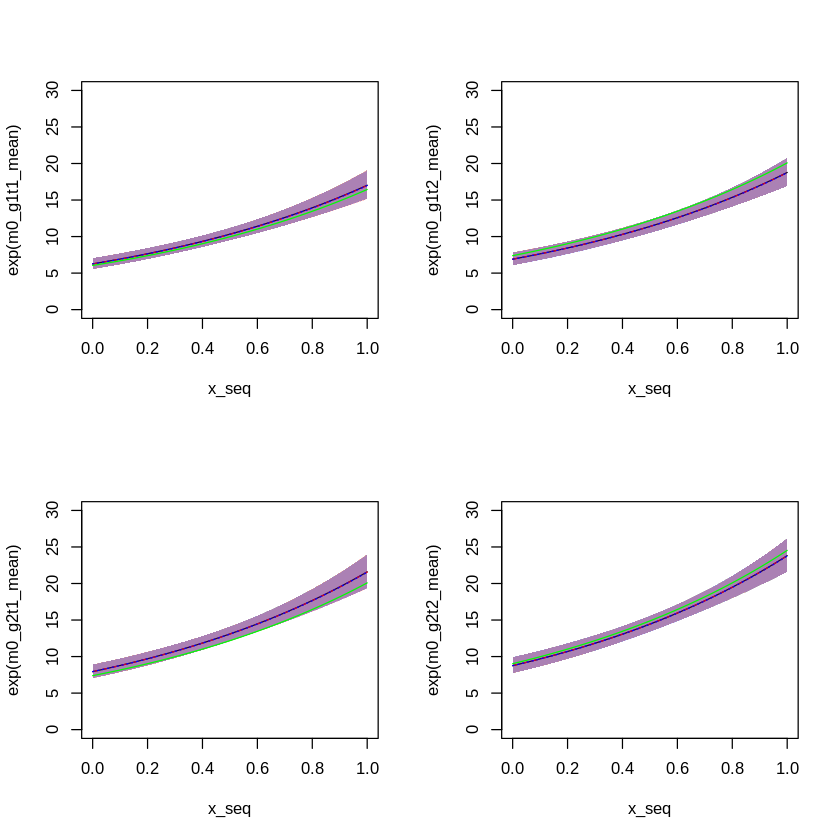

In [ ]:
par(mfrow=c(2,2))

plot(exp(m0_g1t1_mean) ~ x_seq, type="l", ylim=c(0,30))
  shade(exp(m0_g1t1_PI), x_seq, col=col.alpha("black", 0.2))

  lines(exp(m1_g1t1_mean) ~ x_seq, col="red", lty=2)
  shade(exp(m1_g1t1_PI), x_seq, col=col.alpha("red", 0.2))

  lines(exp(m2_g1t1_mean) ~ x_seq, col="blue", lty=3)
  shade(exp(m2_g1t1_PI), x_seq, col=col.alpha("blue", 0.2))

  lines(exp(actual_g1t1) ~ x_seq, col="green")


plot(exp(m0_g1t2_mean) ~ x_seq, type="l", ylim=c(0,30))
  shade(exp(m0_g1t2_PI), x_seq, col=col.alpha("black", 0.2))

  lines(exp(m1_g1t2_mean) ~ x_seq, col="red", lty=2)
  shade(exp(m1_g1t2_PI), x_seq, col=col.alpha("red", 0.2))

  lines(exp(m2_g1t2_mean) ~ x_seq, col="blue", lty=3)
  shade(exp(m2_g1t2_PI), x_seq, col=col.alpha("blue", 0.2))

  lines(exp(actual_g1t2) ~ x_seq, col="green")


plot(exp(m0_g2t1_mean) ~ x_seq, type="l", ylim=c(0,30))
  shade(exp(m0_g2t1_PI), x_seq, col=col.alpha("black", 0.2))

  lines(exp(m1_g2t1_mean) ~ x_seq, col="red", lty=2)
  shade(exp(m1_g2t1_PI), x_seq, col=col.alpha("red", 0.2))

  lines(exp(m2_g2t1_mean) ~ x_seq, col="blue", lty=3)
  shade(exp(m2_g2t1_PI), x_seq, col=col.alpha("blue", 0.2))

  lines(exp(actual_g2t1) ~ x_seq, col="green")


plot(exp(m0_g2t2_mean) ~ x_seq, type="l", ylim=c(0,30))
  shade(exp(m0_g2t2_PI), x_seq, col=col.alpha("black", 0.2))

  lines(exp(m1_g2t2_mean) ~ x_seq, col="red", lty=2)
  shade(exp(m1_g2t2_PI), x_seq, col=col.alpha("red", 0.2))

  lines(exp(m2_g2t2_mean) ~ x_seq, col="blue", lty=3)
  shade(exp(m2_g2t2_PI), x_seq, col=col.alpha("blue", 0.2))

  lines(exp(actual_g2t2) ~ x_seq, col="green")

The predictions from our models are basically identical, the only difference was that the overparameterized model had a few divergent transitions, and they're doing a decent job of tracking the actual data.

So I don't think that overparameterization was a problem here. Still, we can use the non-overparameterized models to estimate the effects fo group and treatment with contrasts.

## Medium

### 13M1

Revisit the Reed frog survival data, `data(reedfrogs)`, and add the predation and size treatment variables to the varying intercepts model. Consider models with either main effect alone,  both main effects, as well as a model including both and their interaction. Instead of focusing on inferences about these two predictor variables, focus on the inferred variation across tanks. Explain  why it changes as it does across models.

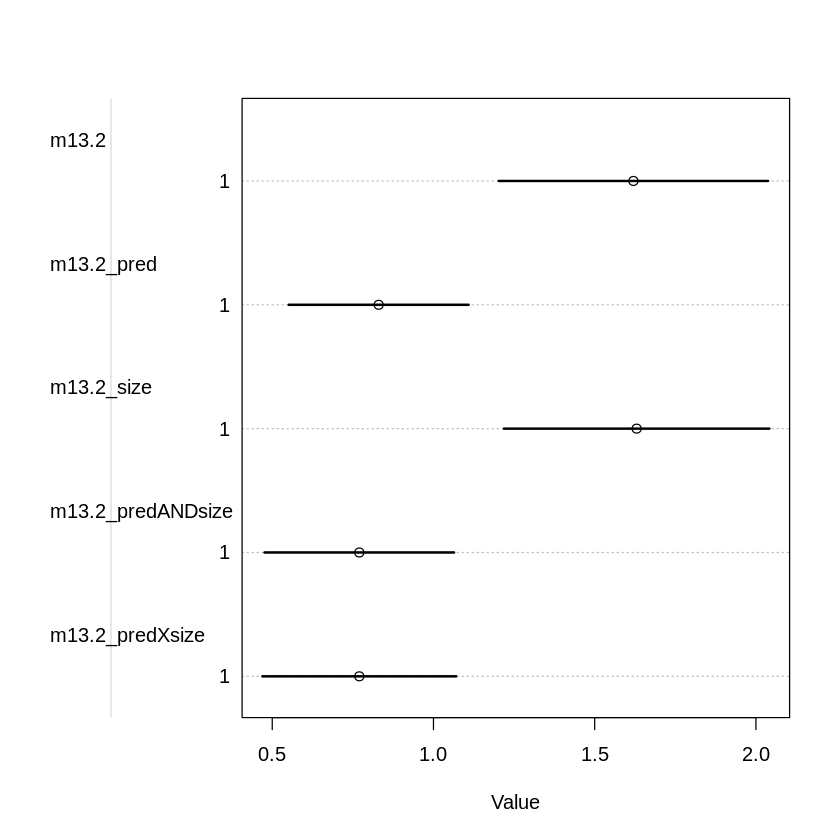

In [ ]:
data(reedfrogs)
d <- reedfrogs

datb <- list(S = d$surv,
             N = d$density,
             tank = 1:nrow(d),
             pred = as.integer(d$pred) - 1,
             tsize = ifelse(d$size == "small", 1, 2)
            )

m13.2 <- ulam(
  alist(
    S ~ dbinom(N, p),
      logit(p) <- a_tank[tank],
        a_tank[tank] ~ dnorm(a_bar, sigma_tank),
          a_bar ~ dnorm(0, 1.5),
          sigma_tank ~ dexp(1)
  ), data=datb,
     chains=4,
     cores=4,
     iter=1000,
     log_lik=TRUE
)

m13.2_pred <- ulam(
  alist(
    S ~ dbinom(N, p),
      logit(p) <- a_tank[tank] + b_pred*pred,
        a_tank[tank] ~ dnorm(a_bar_tank, sigma_tank),
          a_bar_tank ~ dnorm( 0, 1.5),
          sigma_tank ~ dexp(1),
        b_pred ~ dnorm(0, 1)
  ), data=datb,
     chains=4,
     cores=4,
     iter=1000,
     log_lik=TRUE
)


m13.2_size <- ulam(
  alist(
    S ~ dbinom(N, p),
      logit(p) <- a_tank[tank] + a_size[tsize],
        a_tank[tank] ~ dnorm(a_bar_tank, sigma_tank),
          a_bar_tank ~ dnorm( 0, 1.5),
          sigma_tank ~ dexp(1),
        a_size[tsize] ~ dnorm(0, 1)
  ), data=datb,
     chains=4,
     cores=4,
     iter=1000,
     log_lik=TRUE
)

m13.2_predANDsize <- ulam(
  alist(
    S ~ dbinom(N, p),
      logit(p) <- a_tank[tank] + b_pred*pred + a_size[tsize],
        a_tank[tank] ~ dnorm(a_bar_tank, sigma_tank),
          a_bar_tank ~ dnorm(0, 1.5),
          sigma_tank ~ dexp(1),
        b_pred ~ dnorm(0,1),
        a_size[tsize] ~ dnorm(0,1)
  ), data=datb,
     chains=4,
     cores=4,
     iter=1000,
     log_lik=TRUE
)

m13.2_predXsize <- ulam(
  alist(
    S ~ dbinom(N, p),
      logit(p) <- a_tank[tank] + b_pred[tsize]*pred + a_size[tsize],
        a_tank[tank] ~ dnorm(a_bar_tank, sigma_tank),
          a_bar_tank ~ dnorm(0, 1.5),
          sigma_tank ~ dexp(1),
        b_pred[tsize] ~ dnorm(0,1),
        a_size[tsize] ~ dnorm(0,1)
  ), data=datb,
     chains=4,
     cores=4,
     iter=1000,
     log_lik=TRUE
)

plot(coeftab(m13.2, m13.2_pred, m13.2_size, m13.2_predANDsize, m13.2_predXsize), pars="sigma_tank")

When `pred` is entered into the model, the variation (i.e., `sigma_tank`) across tanks is reduced.  Apparently, `pred` is explaining something about the variation across tanks.

### 13M2

Compare the models you fit just above, using WAIC. Can you reconcile the differences in  WAIC with the posterior distributions of the models?

In [ ]:
round(compare(m13.2, m13.2_pred, m13.2_size, m13.2_predANDsize, m13.2_predXsize),2)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m13.2_pred,198.80,8.86,0.00,NA,19.08,0.34
m13.2_predXsize,199.39,8.77,0.59,3.10,19.07,0.25
m13.2_predANDsize,200.14,8.75,1.34,2.14,19.17,0.17
m13.2,200.40,7.36,1.60,5.68,21.21,0.15
m13.2_size,201.54,7.31,2.75,5.45,21.60,0.09


These models are really pretty similar in terms of WAIC.  But there is a general trend for those with `pred` in the model to have better scores than those without.  This matches the pattern we saw in 13M1 with the `sigma_tank` parameter.

Now, I'm not sure what is meant by "reconcile the differences in WAIC with the posterior distributions...".  So let's look at the posteriors and try to get some traction.

In [ ]:
round(precis(m13.2_pred, depth=2), 2)
round(precis(m13.2_predXsize, depth=2), 2)
round(precis(m13.2_predANDsize, depth=2), 2)
round(precis(m13.2, depth=2), 2)
round(precis(m13.2_size, depth=2), 2)

,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a_tank[1],2.43,0.69,1.39,3.56,1.00,1410.09
a_tank[2],2.92,0.71,1.82,4.09,1.00,1639.99
a_tank[3],1.66,0.58,0.71,2.59,1.00,1507.13
a_tank[4],2.93,0.76,1.76,4.18,1.00,1787.51
a_tank[5],2.46,0.67,1.41,3.57,1.00,2150.61
a_tank[6],2.44,0.70,1.37,3.60,1.00,1450.04
a_tank[7],2.89,0.72,1.77,4.07,1.01,1632.37
a_tank[8],2.43,0.71,1.34,3.63,1.00,1932.47
a_tank[9],2.12,0.56,1.21,2.97,1.01,858.15


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a_tank[1],1.96,0.91,0.41,3.39,1.02,102.30
a_tank[2],2.35,0.95,0.82,3.82,1.02,108.19
a_tank[3],1.22,0.90,-0.20,2.62,1.03,85.92
a_tank[4],2.36,0.95,0.83,3.86,1.02,106.44
a_tank[5],1.96,0.92,0.45,3.40,1.02,112.05
a_tank[6],1.96,0.92,0.51,3.43,1.02,103.03
a_tank[7],2.39,0.97,0.81,3.98,1.01,122.55
a_tank[8],1.95,0.89,0.48,3.35,1.02,107.41
a_tank[9],1.88,0.85,0.46,3.17,1.02,84.24


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a_tank[1],1.99,0.87,0.58,3.41,1.03,105.54
a_tank[2],2.41,0.91,0.99,3.85,1.03,100.56
a_tank[3],1.29,0.83,0.03,2.62,1.03,103.02
a_tank[4],2.42,0.93,0.95,3.88,1.03,105.73
a_tank[5],1.85,0.90,0.44,3.40,1.03,115.58
a_tank[6],1.83,0.88,0.45,3.24,1.03,114.45
a_tank[7],2.30,0.91,0.87,3.80,1.03,104.56
a_tank[8],1.85,0.89,0.41,3.29,1.03,122.68
a_tank[9],1.80,0.83,0.48,3.18,1.04,83.97


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a_tank[1],2.15,0.89,0.86,3.74,1.00,4046.10
a_tank[2],3.02,1.11,1.39,4.99,1.00,3993.66
a_tank[3],1.01,0.64,0.04,2.06,1.01,3361.63
a_tank[4],3.08,1.12,1.54,5.06,1.00,2706.26
a_tank[5],2.11,0.84,0.84,3.54,1.00,3022.82
a_tank[6],2.14,0.86,0.89,3.61,1.00,3917.81
a_tank[7],3.06,1.11,1.50,5.06,1.00,3358.19
a_tank[8],2.13,0.86,0.86,3.63,1.01,4518.77
a_tank[9],-0.18,0.64,-1.21,0.81,1.01,3868.13


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a_tank[1],2.12,1.15,0.36,3.97,1.04,84.61
a_tank[2],3.05,1.31,1.02,5.19,1.03,136.81
a_tank[3],1.01,0.98,-0.49,2.69,1.05,77.77
a_tank[4],3.07,1.30,1.18,5.21,1.03,121.52
a_tank[5],1.84,1.14,0.09,3.74,1.04,113.99
a_tank[6],1.84,1.13,0.16,3.71,1.04,72.41
a_tank[7],2.82,1.37,0.77,5.09,1.03,153.84
a_tank[8],1.83,1.15,0.12,3.72,1.04,97.45
a_tank[9],-0.18,0.97,-1.65,1.43,1.06,54.11


There's quite a bit of scrolling, but the important parameters, I think, are the `b_pred`'s and `a_size`'s.  In general, the `b_pred`'s are reliably negative while `a_size`'s are very ambiguous (heavily straddling 0). This seems congruent with the observations from the WAIC comparison; `pred` is doing some explanatory work while `size` is not.

### 13M3

Re-estimate the basic Reed frog varying intercept model, but now using a Cauchy distribution in place of the Gaussian distribution for the varying intercepts. That is, fit this model:

$$
\begin{aligned}
s_i &\sim \text{Binomial}(n_i, p_i) \\
\text{logit}(p_i) &= \alpha_{\text{tank}[i]} \\
\alpha_{\text{tank}} &\sim \text{Cauchy}(\alpha, \sigma) \\
\alpha &\sim \text{Normal}(0,1) \\
\sigma &\sim \text{Exponential}(1)
\end{aligned}
$$

(You are likely to see many divergent transitions for this model. Can you figure out why? Can you  fix them?) Compare the posterior means of the intercepts, αtank, to the posterior means produced  in the chapter, using the customary Gaussian prior. Can you explain the pattern of differences? Take  note of any change in the mean α as well.